In [7]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import naive_bayes
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')


In [8]:
#READ THE DATASET AND SHOW THE FIRST 5 ROWS
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
#SHOW THE COLUMN NAMES
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
#INFORMATION ABOUT THE DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
#DESCRIBE THE DATASET SUCH AS MEAN ,MEDIAN ETC.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
#CHECK FOR NULL VALUES
df.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [13]:
#TO CHECK THE NUMBER OF NULL VALUES THAT MIGHT BE PRESENT
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

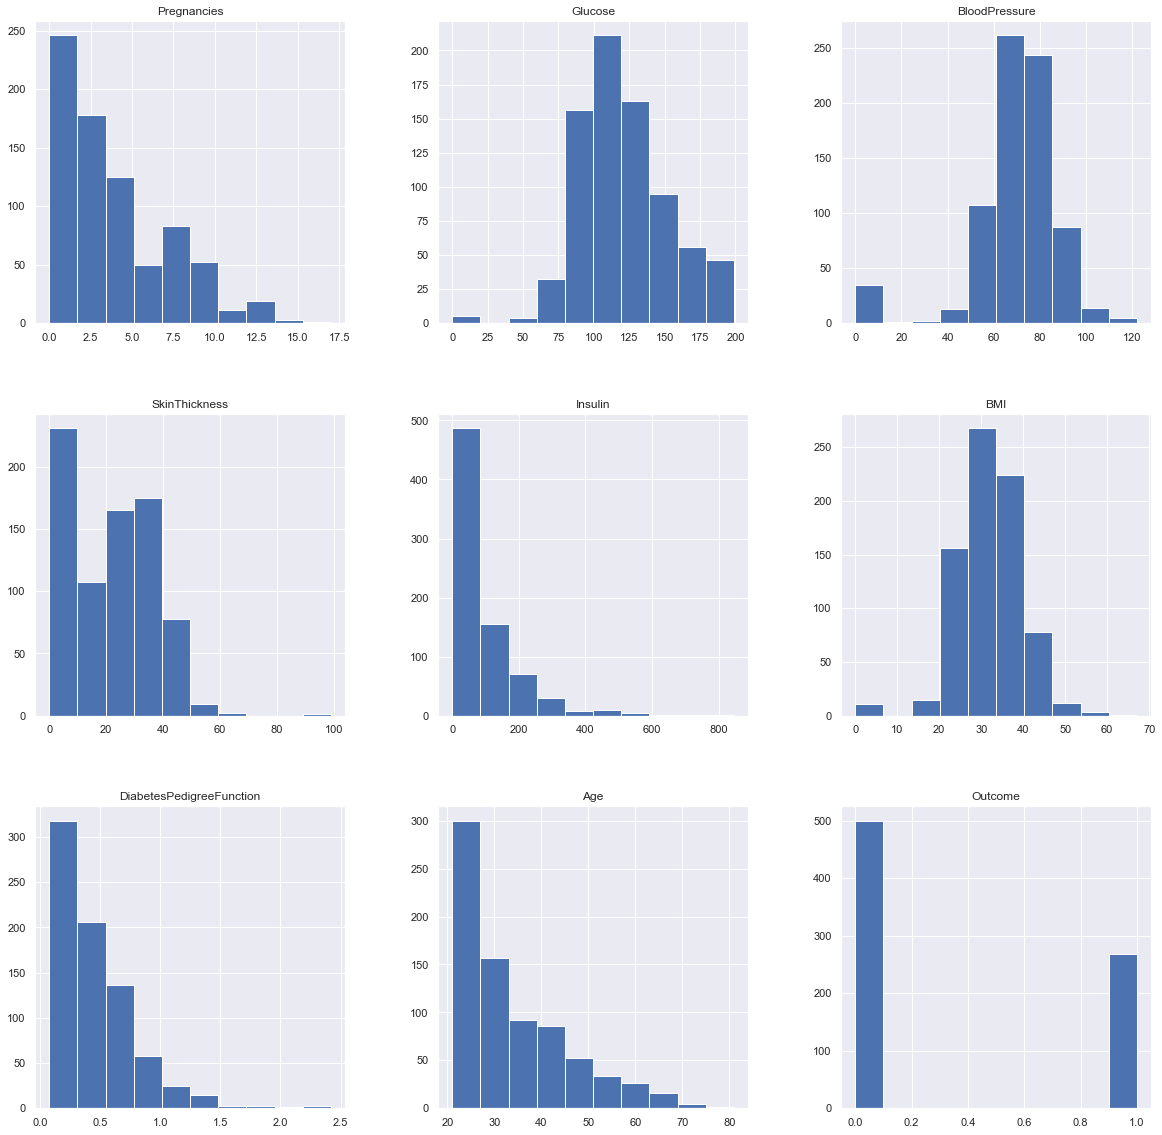

In [14]:
#PLOTTING THE DATA DISTRIBUTION BEFORE REMOVING THE NULL VALUES
p = df.hist(figsize = (20,20))

In [15]:
#THE DATASET HAS MISSING VALUES THAT THEY HAVE REPLACED WITH 0 WHICH IS NOT GOOD AS THEY HAMPER THE AUTHENTICITY AND THEY HAMPER IN THE PREDICTION LATER ON
# AND WE REPLACE THE 0'S BY NaN
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [16]:
#SHOWING THE COUNT OF NaN
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [17]:
#NOW WE WILL IMPUTE THE MEAN VALUE IN THE MISSING VALUES
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

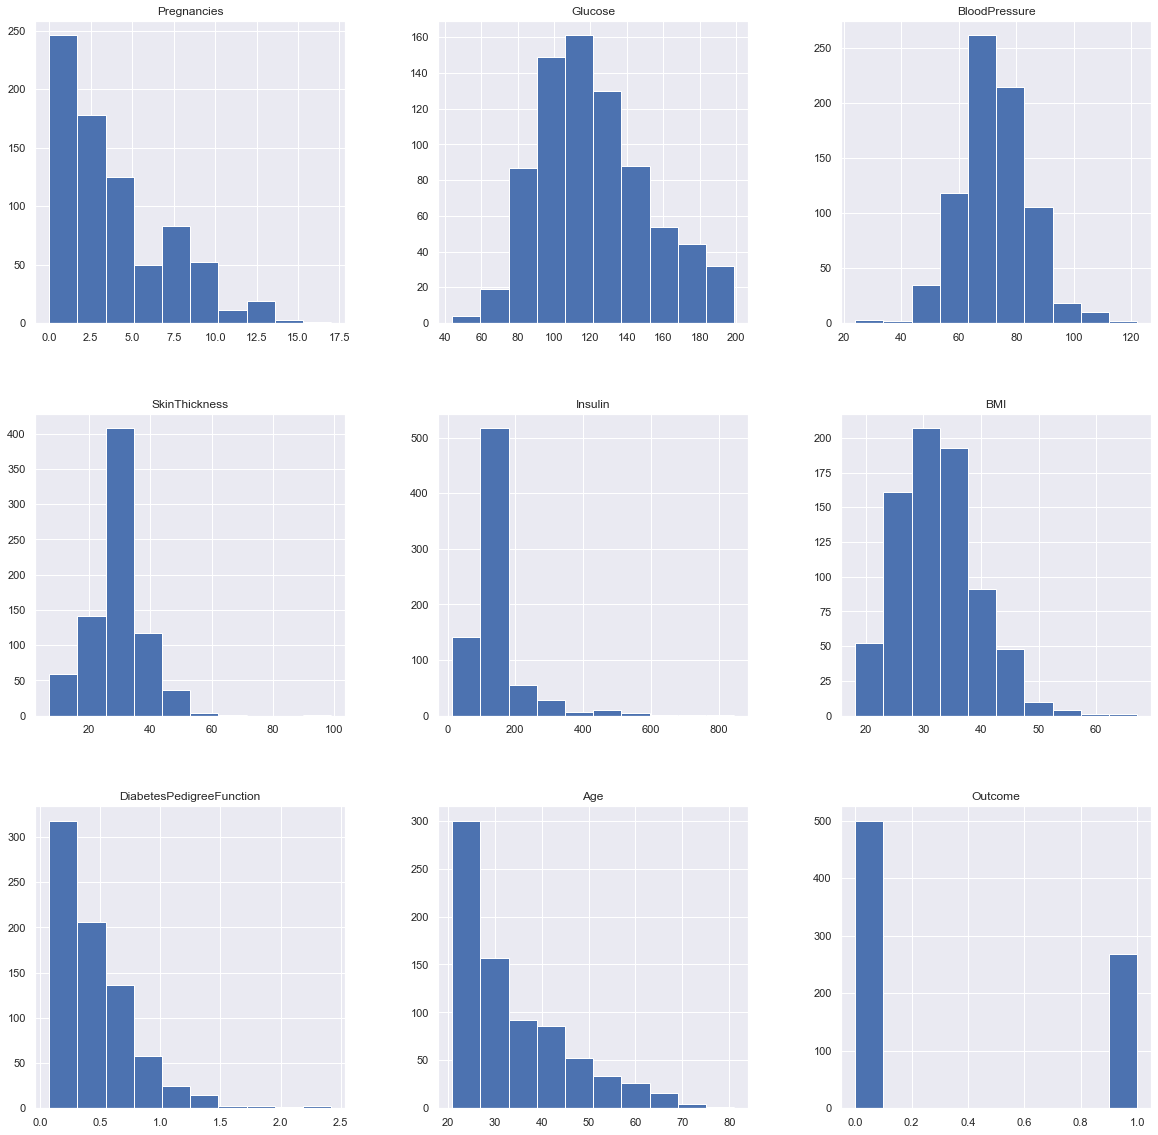

In [18]:
#PLOTTING AFTER WE REPLACE THE MISSING VALUES
p = df_copy.hist(figsize = (20,20))

0    500
1    268
Name: Outcome, dtype: int64


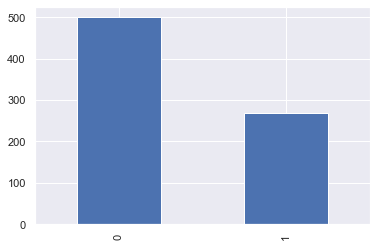

In [19]:
#NOEW LETS CHECK WHETHER THE OUTCOME COLUMN IS BALANCED
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(df.Outcome.value_counts())
p=df.Outcome.value_counts().plot(kind="bar")

In [20]:
#THE ABOVE DIAGRAM SHOWS THAT IT IS COMPLETELY DISBALANCED

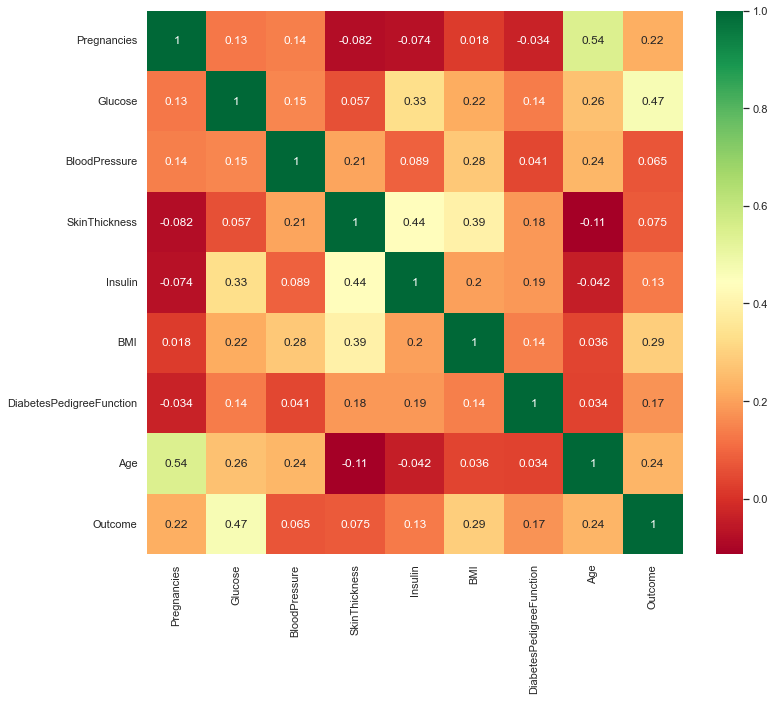

In [21]:
#COORELATION BETWEEN ALL THE FEATURES
plt.figure(figsize=(12,10))
p = sns.heatmap(df.corr(),annot=True,cmap ='RdYlGn')

In [22]:
#LETS SEE THE FIRST 5 ROWS OF THE DATASET
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
#LETS GO FOR STANDARD SCALING
stdscale = StandardScaler()
X =  pd.DataFrame(stdscale.fit_transform(df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [24]:
#SINCE ONLY THE TARGET COLUMN IS LEFT, OUT LETS SEE THAT
y = df_copy.Outcome
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [25]:
#MODEL BUILDING 

In [26]:
#ASSIGNING VALUES TO X AND Y
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [27]:
#SPLITTING X AND Y INTRO TRAINING AND TESTING WHERE 33% OF DATASET IS KEPT FOR TESTING
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,
                                                    random_state=7)

In [28]:
#LETS APPLY THE ALGORITHMS

In [29]:
#1. RANDOM FOREST

In [30]:
#TRAINING 
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
rfc_train = rfc.predict(x_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [31]:
#OVERFITTED TRAINING PORTION 
# AND LETS HOP TO THE TESTING PART

from sklearn import metrics

predictions = rfc.predict(x_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7575757575757576


In [32]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[123  24]
 [ 32  52]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       147
           1       0.68      0.62      0.65        84

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.75      0.76      0.75       231



In [33]:
#2.  DECISION TREE

In [34]:
#TRAINING PORTION

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)


DecisionTreeClassifier()

In [35]:
# APLYING ON TESTING PORTION 
from sklearn import metrics

predictions1 = dtree.predict(x_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions1)))

Accuracy Score = 0.7186147186147186


In [36]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions1))
print(classification_report(y_test,predictions1))

[[116  31]
 [ 34  50]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       147
           1       0.62      0.60      0.61        84

    accuracy                           0.72       231
   macro avg       0.70      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



In [37]:
#3.   NAIVE BAYES

In [38]:
#TRAINING,TESTING AND FINDING ACCURACY
model=naive_bayes.GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('accuracy:  ',metrics.accuracy_score(y_test,y_pred))

accuracy:   0.7402597402597403


In [39]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[116  31]
 [ 29  55]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       147
           1       0.64      0.65      0.65        84

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [40]:
       #HENCE WE GO FOR RANDOM FOREST

In [41]:
#BUILDING PREDICTION MODEL

In [42]:

import pickle
#use dump function to save the model using pickle
saved_model = pickle.dumps(rfc)

# to load the model
rfc_from_pickle = pickle.loads(saved_model)

#  after loading that model we will use this to make predictions
rfc_from_pickle.predict(x_test)

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [43]:
#CHECKING HEAD
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
#CHECKING TAIL
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [45]:
#USING THE PREDICTION MODEL TO TEST 

In [46]:
#CHECK FOR THE FOURTH PATIENT
rfc.predict([[0,137,40,35,168,43.1,2.228,33]])

array([1], dtype=int64)

In [47]:
#CHECK FOR THE 764TH PATIENT
rfc.predict([[2,122,70,27,0,36.8,0.340,27]])

array([0], dtype=int64)

In [48]:
#PRINT DATA OF 500TH PATIENT
print(df.loc[[500]])

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
500            2      117             90             19       71  25.2   

     DiabetesPedigreeFunction  Age  Outcome  
500                     0.313   21        0  


In [49]:
#CHECK DIABETES FOR 500TH PATIENT
rfc.predict([[2,117,90,19,71,25.2,0.313,21]])

array([0], dtype=int64)